In [7]:
from pycap import PropertyTree
from pycap import CyclicVoltammetry
import sys
sys.path.append('/notebooks')
from battery import *
from energy_storage_device import Dualfoil
from matplotlib import pyplot

In [2]:
file_path = '/notebooks/docker/dualfoil5-1/'
df = Dualfoil(path=file_path)
v = df.get_voltage()
print(v)

4.51601


In [3]:
v1 = 3.0
v2 = 4.5
step_size = .10
ptree = PropertyTree()
ptree.put_double('cycles', 6)
ptree.put_double('scan_limit_1', v1)
ptree.put_double('scan_limit_2', v2)
ptree.put_double('initial_voltage', 4.50)
ptree.put_double('final_voltage', 4.50)
ptree.put_double('scan_rate', 50e-3)
ptree.put_double('step_size', step_size)

In [4]:
%matplotlib inline
from pycap import initialize_data, plot_data
data = initialize_data()

df.reset()
exp = CyclicVoltammetry(ptree)
%time exp.run(df, data)


.....................................................................................................................................................................................CPU times: user 1.37 s, sys: 5.55 s, total: 6.92 s
Wall time: 10min 15s


180

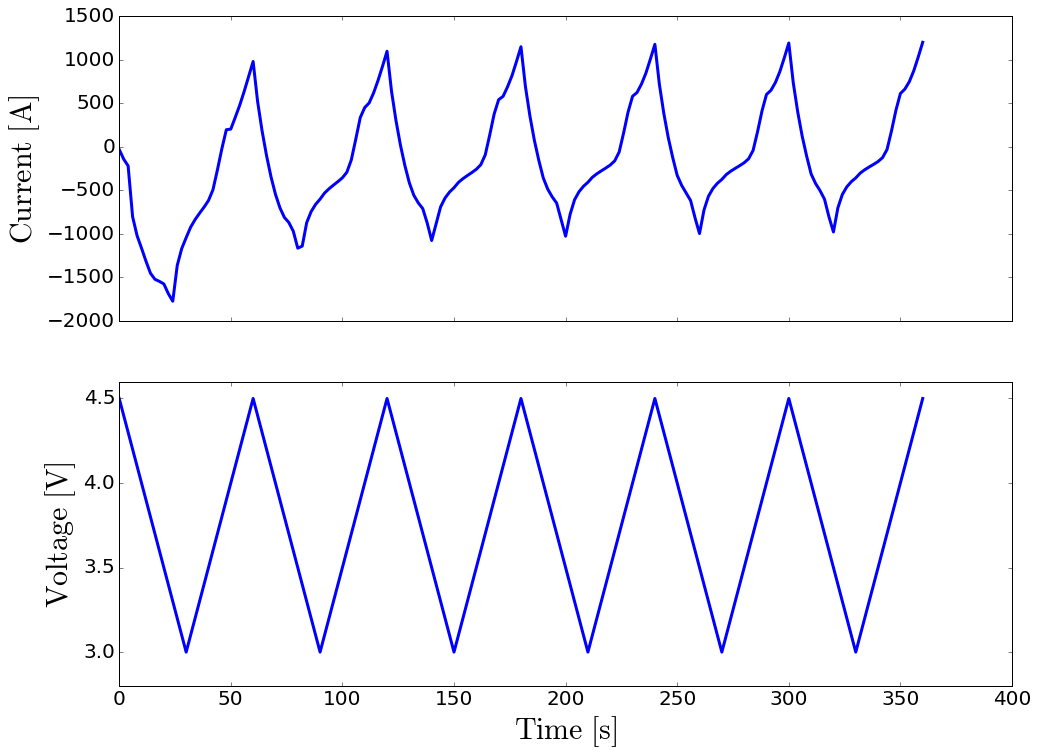

In [5]:
plot_data(data)

32


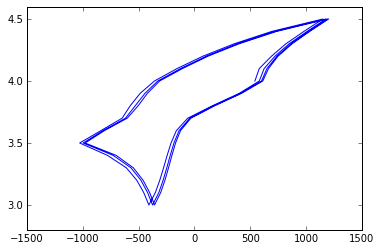

In [8]:
# variable to count the number of steps per cycle
# used to print only one cycle
cycle = int(2*((v2-(v1-step_size)) / step_size))
print(cycle)
# plot last 3 cycles 
x = data['current'][-3*cycle:]
y = data['voltage'][-3*cycle:]
pyplot.plot(x, y)
#pyplot.xlim(-1e-5, 1e-5)